In [72]:
from gadf import gadf
from gasf import gasf
from vg import vg
from hvg import hvg
from network_utils import white_noise, plot_hist
from random import gauss
import pandas
from pandas import Series
import numpy as np
from collections import Counter
import math

In [85]:
def extraer_diagonales(matriz):
    nueva_matriz = [[0] * len(matriz) for _ in range(len(matriz))]

    nueva_matriz[0][0] = matriz[0][0]
    nueva_matriz[0][1] = matriz[0][1]
    nueva_matriz[len(matriz)-1][len(matriz)-1] = matriz[len(matriz)-1][len(matriz)-1]
    nueva_matriz[len(matriz)-1][len(matriz)-2] = matriz[len(matriz)-1][len(matriz)-2]

    for i in range(1, len(matriz) - 1):
        nueva_matriz[i][i] = matriz[i][i]
        nueva_matriz[i][i-1] = matriz[i][i-1]
        nueva_matriz[i][i+1] = matriz[i][i+1]

    return nueva_matriz

In [86]:
# Ejemplo de uso:
matriz_ejemplo = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

nueva_matriz = extraer_diagonales(matriz_ejemplo)
print(nueva_matriz)

[[1, 2, 0], [4, 5, 6], [0, 8, 9]]


# Experimento 1

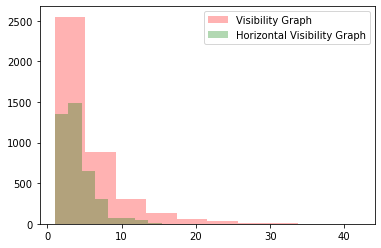

In [2]:
t_d, ts = plot_hist(10, 400)

Con lo anterior vemos que en este experimento la distribución de el grado de los grafos sigue $P(k) = k^{-\alpha}$ para un cierto $\alpha.$

In [3]:
ts = white_noise(25)

In [4]:
gadm = gadf(ts)

/home/cperezln/vg-gaf/vg_gaf/cristianperez/gadf.py:6: RuntimeWarning: invalid value encountered in arccos
  angles = [np.arccos(i) for i in rescaled]


In [5]:
gasm = gasf(ts)

/home/cperezln/vg-gaf/vg_gaf/cristianperez/gasf.py:6: RuntimeWarning: invalid value encountered in arccos
  angles = [np.arccos(i) for i in rescaled]


In [6]:
vg = vg(ts)[1]

In [7]:
import matplotlib.pyplot as plt

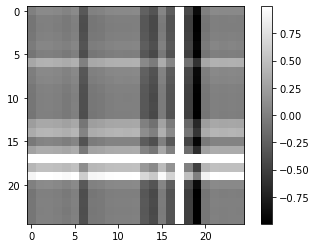

In [8]:
plt.imshow(gadm, cmap='gray')
plt.colorbar();

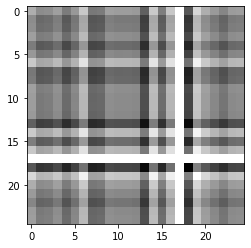

In [9]:
plt.imshow(gasm, cmap = 'gray')

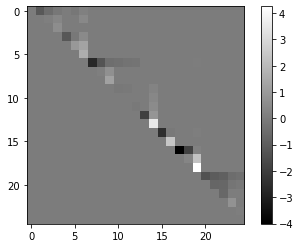

In [10]:
plt.imshow(vg, cmap='gray')
plt.colorbar();

# Experimento 2

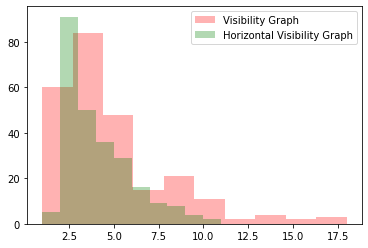

In [7]:
t_d, g, ts = plot_hist(5, 50)

In [8]:
from networkx import sigma

In [9]:
sigma(g[0][0])

2.5669331132264537

In [10]:
sigma(g[1][0])

3.445434279344937

In [11]:
from networkx import omega

In [12]:
omega(g[0][0])

-0.09854160709179283

In [13]:
omega(g[1][0])

-0.14453271028037384

# Nuevos experimentos

- GAF como grafo, ¿qué propiedades tiene? ¿cuánto se parece al GAF? (en cuanto a propiedades teóricas de grafos)
- GAF pero con vecinos cercanos, i.e, calcular para diagonales.
- VG de ruido blanco y VG de serie normal. ¿Qué propiedades del rudio blanco de la serie puedes obtener a partir de conocer las propiedades del VG de ruido blanco?

## Experimento 1
Vamos a estudiar el parecido de la escalarización de las diagonales principales (superiores) del GAF y VG

In [7]:
ts = white_noise(50)

In [8]:
vgm = vg(ts)[1]

In [10]:
gasm = gasf(ts)

In [11]:
gadm = gadf(ts)

In [12]:
diag_gaf = [gasm[i][i+1] for i in range(49)]

In [13]:
diag_vg = [vgm[i][i+1] for i in range(49)]

In [14]:
diag_dgaf = [gadm[i][i+1] for i in range(49)]

In [15]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [16]:
ndiag_gaf = NormalizeData(diag_gaf)

In [17]:
ndiag_dgaf = NormalizeData(diag_dgaf)

In [18]:
ndiag_vg = NormalizeData(diag_vg)

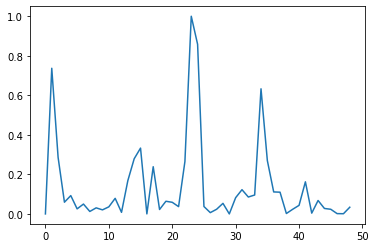

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(49), ndiag_gaf)

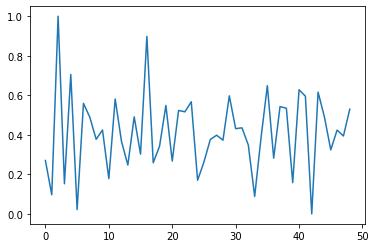

In [20]:
fig, ax = plt.subplots()
ax.plot(range(49), ndiag_vg)

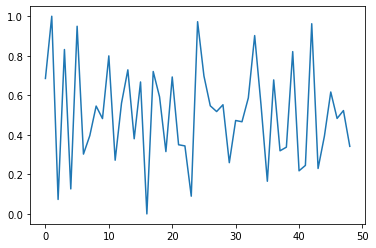

In [21]:
fig, ax = plt.subplots()
ax.plot(range(49), ndiag_dgaf)

In [22]:
from scipy.stats import pearsonr, spearmanr

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
spearmanr(ndiag_gaf, ndiag_dgaf)

SpearmanrResult(correlation=-0.0323469387755102, pvalue=0.8253720328960662)

In [24]:
spearmanr(ndiag_gaf, ndiag_vg)

SpearmanrResult(correlation=0.04571428571428571, pvalue=0.7551148352966082)

In [25]:
spearmanr(ndiag_dgaf, ndiag_vg)

SpearmanrResult(correlation=-0.994081632653061, pvalue=5.711594851736317e-47)

Para la primera muestra parece que el experimento tendría más sentido con el Gramian Angular Field de diferencias que con el de sumas. Vamos a computarlo para 1000 muestras distintas de esta forma.

In [26]:
ts_1000 = [white_noise(50) for _ in range(1000)]

In [27]:
ndiag_gaf_1000 = [NormalizeData([gasf(ts_1000[j])[i][i+1] for i in range(49)]) for j in range(1000)]

/home/cperezln/vg-gaf/vg_gaf/cristianperez/gasf.py:6: RuntimeWarning: invalid value encountered in arccos
  angles = [np.arccos(i) for i in rescaled]


In [28]:
ndiag_dgaf_1000 = [NormalizeData([gadf(ts_1000[j])[i][i+1] for i in range(49)]) for j in range(1000)]

/home/cperezln/vg-gaf/vg_gaf/cristianperez/gadf.py:6: RuntimeWarning: invalid value encountered in arccos
  angles = [np.arccos(i) for i in rescaled]


In [29]:
ndiag_vg_1000 = [NormalizeData([(vg(ts_1000[j])[1])[i][i+1] for i in range(49)]) for j in range(1000)]

Una vez se tienen los valores para las 1000 muestras, vamos a calcular el coeficiente de Spearman para todas las combinaciones para todas las muestras

In [30]:
sgg = [spearmanr(i, j) for i, j in zip(ndiag_gaf_1000, ndiag_dgaf_1000)]
sgv = [spearmanr(i, j) for i, j in zip(ndiag_gaf_1000, ndiag_vg_1000)]
svg = [spearmanr(i, j) for i, j in zip(ndiag_dgaf_1000, ndiag_vg_1000)]

In [31]:
import numpy as np

In [32]:
sggf = [i[0] for i in sgg]
sgvf = [i[0] for i in sgv]
svgf = [i[0] for i in svg]

In [33]:
np.mean(np.array(sggf)[~np.isnan(sggf)])

-0.0023926882365062404

In [34]:
np.mean(np.array(sgvf)[~np.isnan(sgvf)])

0.0038347794207503356

In [35]:
np.mean(np.array(svgf)[~np.isnan(svgf)])

-0.9892906897359109

In [71]:
diag_gaf_1000 = [[gasf(ts_1000[j])[i][i+1] for i in range(49)] for j in range(1000)]
diag_dgaf_1000 = [[gadf(ts_1000[j])[i][i+1] for i in range(49)] for j in range(1000)]

TypeError: 'Graph' object is not callable

In [75]:
diag_vg_1000 = [[vg(ts_1000[j])[1][i][i+1] for i in range(49)] for j in range(1000)]

In [78]:
nnsgg = [spearmanr(i, j) for i, j in zip(diag_gaf_1000, diag_dgaf_1000)]
nnsgv = [spearmanr(i, j) for i, j in zip(diag_gaf_1000, diag_vg_1000)]
nnsvg = [spearmanr(i, j) for i, j in zip(diag_dgaf_1000, diag_vg_1000)]

In [79]:
nnsggf = [i[0] for i in nnsgg]
nnsgvf = [i[0] for i in nnsgv]
nnsvgf = [i[0] for i in nnsvg]

In [80]:
np.mean(np.array(nnsggf)[~np.isnan(nnsggf)])

-0.002394643269579578

In [81]:
np.mean(np.array(nnsgvf)[~np.isnan(nnsgvf)])

0.0038347794207503356

In [82]:
np.mean(np.array(nnsvgf)[~np.isnan(nnsvgf)])

-0.9892927068229117

### Parte 2, comparación de matrices y grafos

Parece que en la vecindad, la GADF y VG se parecen bastante... ¿Se puede seguir explotando esto?

In [89]:
ts = white_noise(25)

In [90]:
vg1 = vg(ts)[1]

In [91]:
gadm1 = gadf(ts)

In [92]:
vg1n = NormalizeData(vg1)

In [93]:
gadm1n = NormalizeData(gadm1)

In [94]:
import networkx as nx

In [95]:
vg = nx.Graph(np.array(vg1n))

In [96]:
gadg = nx.Graph(np.array(gadm1n))

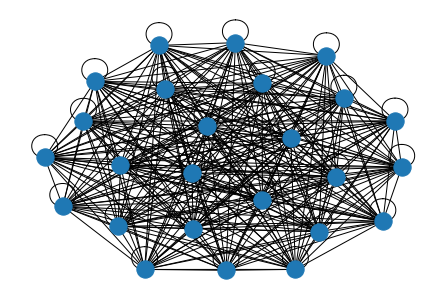

In [97]:
nx.draw(vg)

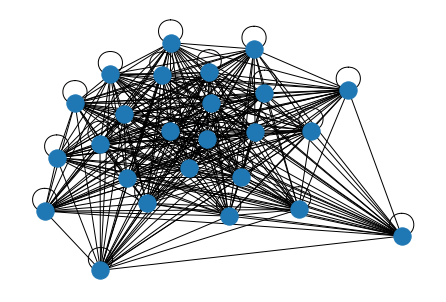

In [98]:
nx.draw(gadg)

In [99]:
nx.graph_edit_distance(vg, gadg)

0.0

In [100]:
vg_s = nx.Graph(np.array(vg1))

In [101]:
gadg_s = nx.Graph(np.array(gadm1))

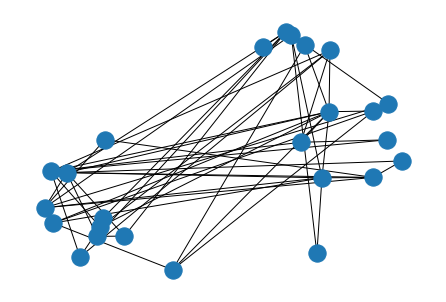

In [102]:
nx.draw(vg_s)

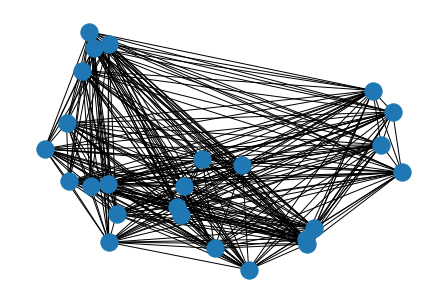

In [103]:
nx.draw(gadg_s)

In [104]:
nx.graph_edit_distance(vg_s, gadg_s)

250.0

Vamos ahora a verlo con imágenes
### Normalizadas

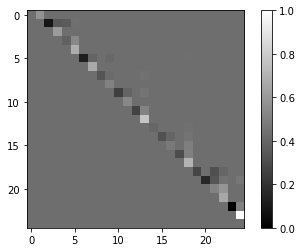

In [105]:
plt.imshow(vg1n, cmap='gray')
plt.colorbar();

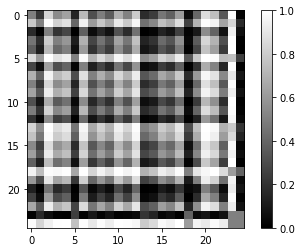

In [106]:
plt.imshow(gadm1n, cmap='gray')
plt.colorbar();

### No normalizadas

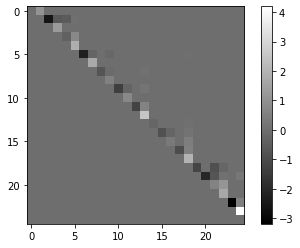

In [107]:
plt.imshow(vg1, cmap='gray')
plt.colorbar();

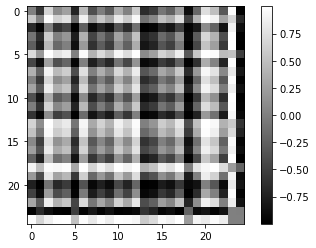

In [108]:
plt.imshow(gadm1, cmap='gray')
plt.colorbar();

Uno de los problemas que encuentro principales de intentar comparar el VG con el GAF es lo sparse que es el VG y lo denso que es el otro. Vamos a probar a quedarnos unicameente con una parte de la matriz

In [109]:
gadm2 = extraer_diagonales(gadm1)

In [112]:
gadmg2 = nx.Graph(np.array(gadm2))

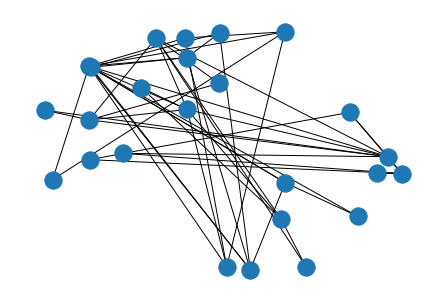

In [114]:
nx.draw(vg_s)

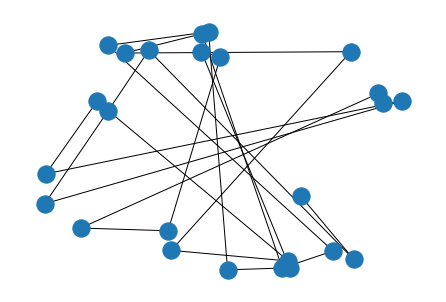

In [115]:
nx.draw(gadmg2)

In [117]:
nx.graph_edit_distance(vg_s, gadmg2)

26.0

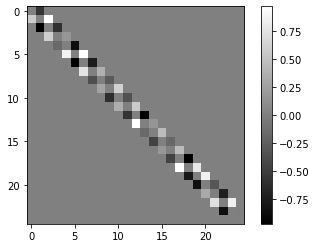

In [118]:
plt.imshow(gadm2, cmap='gray')
plt.colorbar();

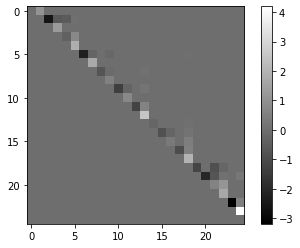

In [119]:
plt.imshow(vg1, cmap='gray')
plt.colorbar();

# Experimento 2
Parecidos entre los grafos que vienen de la matriz de GAF y VG

In [58]:
ts = white_noise(25)

In [65]:
gaf = np.array(gasf(ts)) + 1

In [66]:
gaf

array([[ 1.98574588,  1.412852  ,  0.96485737,  1.81887466,  1.91351366,
         0.53174231,  1.65617311,  0.89574334,  0.77016055,  1.03187951,
         2.49287294,  1.92917171,  1.24310187,  0.94961069,  1.9537889 ,
         2.40188907,  2.15954178,  1.57264693,  2.05134911,  0.50716754,
                nan,  2.22524482,  0.91136322,  1.82135849,  1.56737553],
       [ 1.412852  ,  0.83995812,  0.39196349,  1.24598079,  1.34061979,
        -0.04115157,  1.08327924,  0.32284946,  0.19726667,  0.45898563,
         1.91997906,  1.35627783,  0.670208  ,  0.37671682,  1.38089503,
         1.8289952 ,  1.58664791,  0.99975305,  1.47845523, -0.06572634,
                nan,  1.65235094,  0.33846935,  1.24846462,  0.99448166],
       [ 0.96485737,  0.39196349, -0.05603115,  0.79798615,  0.89262515,
        -0.4891462 ,  0.6352846 , -0.12514518, -0.25072796,  0.010991  ,
         1.47198443,  0.9082832 ,  0.22221336, -0.07127782,  0.93290039,
         1.38100056,  1.13865327,  0.55175842,  1